In [16]:
# import numpy and exp mat
import os
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [17]:
from module.QuantumSystem import SHOscillator
from module.Walker import FokkerPlankWalker
from module.Utils import VMC

# Spherical Harmonic Oscillator without interaction, with Metropolis and analytical hamiltonian
In this notebook we study the Spherical Harmonic Oscillator without interaction, using the Metropolis algorithm and analytical hamiltonian.

In the first section we study the scaling of the execution time and the std of the mean energy (for an non optimal variational parameter) as function of the dimension of the system and the number of particles and fixed sampling steps.

## Grid search
In this section we perform a grid search of $\alpha$ for fixed N and D.
In particular we save the mean energy, the std of the mean energy and the time of execution for each $\alpha$ then we plot the results.

During a grid search warmup plot of the energies and the blocking plot are saved in a directory, so one can always check if the results are rasonable.

In [36]:
params = np.array([0.6])
warmup_steps = 50000
calibrate_steps = 50000
run_steps = 1000000

N = 20
D = 3

system = SHOscillator(N, D, params)
walker = FokkerPlankWalker(system)
vmc = VMC(system, walker, params, 
          warmup_steps, run_steps, 
          calibrate_steps, acceptance_rate=0.57,
          block_quantiles=0.8, plot=True, verbose=True)

-----------------
VMC calibrate
-----------------
delta: 0.06849269750742976
subgroup_size: 1
Acceptance rate: 0.591
-----------------
VMC warmup
-----------------
Parameters: [0.6]
Acceptance rate: 0.52748


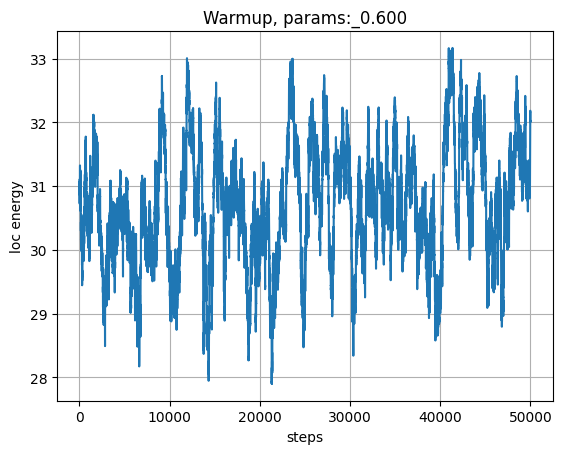

-----------------
VMC run
-----------------
Parameters: [0.6]
Acceptance rate: 0.525054
Time:  3.357208728790283
Energy: 30.491193171288018 +/- 0.03599598201552262


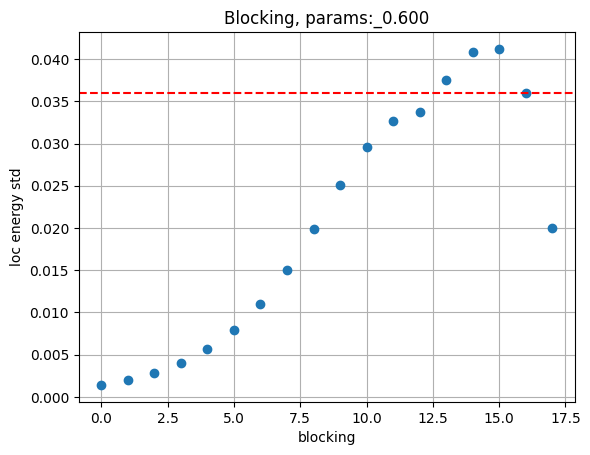

In [37]:
# warmup
vmc.calibrate()
vmc.warmup()
vmc.run()

## Compare with analytical results
In this section we compare the results of the grid search with the analytical results, in particular we show that the mean energy is the exact ground state energy of the system.

In [38]:
print('MC mean energy:', vmc.get_energy(), '+-', vmc.get_energy_std())  
print('Analytical energy:', 0.5*N*D, '+-', 0.0)

MC mean energy: 30.491193171288018 +- 0.03599598201552262
Analytical energy: 30.0 +- 0.0
